# Plot zostoga from CMIP5 and CMIP6

In [2]:
import sys
import importlib

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

sys.path.append('../code/')
import mod_loc as loc
import mod_postpro as pp

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [3]:
importlib.reload(pp)

<module 'mod_postpro' from '../code/mod_postpro.py'>

In [4]:
data_dir = '../outputs/'

In [5]:
ls {data_dir}

cmip5_zos_historical/     cmip5_zostoga/            cmip6_zos_ssp585/
cmip5_zos_rcp26/          cmip6_zos_historical/     cmip6_zos_zostoga_v2.zip
cmip5_zos_rcp45/          cmip6_zos_ssp119/         cmip6_zostoga/
cmip5_zos_rcp60/          cmip6_zos_ssp126/         csv_files/
cmip5_zos_rcp85/          cmip6_zos_ssp245/         version1/
cmip5_zos_zostoga_v2.zip  cmip6_zos_ssp370/


In [6]:
def plot_all(zostoga_ds):
    fig, axes = plt.subplots(ncols=1)
    for mod in zostoga_ds.model:
        zostoga_ds.zostoga_corrected.sel(model=mod).plot(ax=axes, label=mod.values)
    axes.set_title('zostoga')
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    display(fig)
    plt.close()

### Check CMIP5 data

### Results for rcp26
18 models available
Mean and 5-95 percentile range: 
Year 2099
0.14303367551889318 [ 0.10128118975236075 - 0.1847861612854256 ]
Year 2081-2099
0.1349000468520168 [ 0.09705564964405075 - 0.17274444405998285 ]


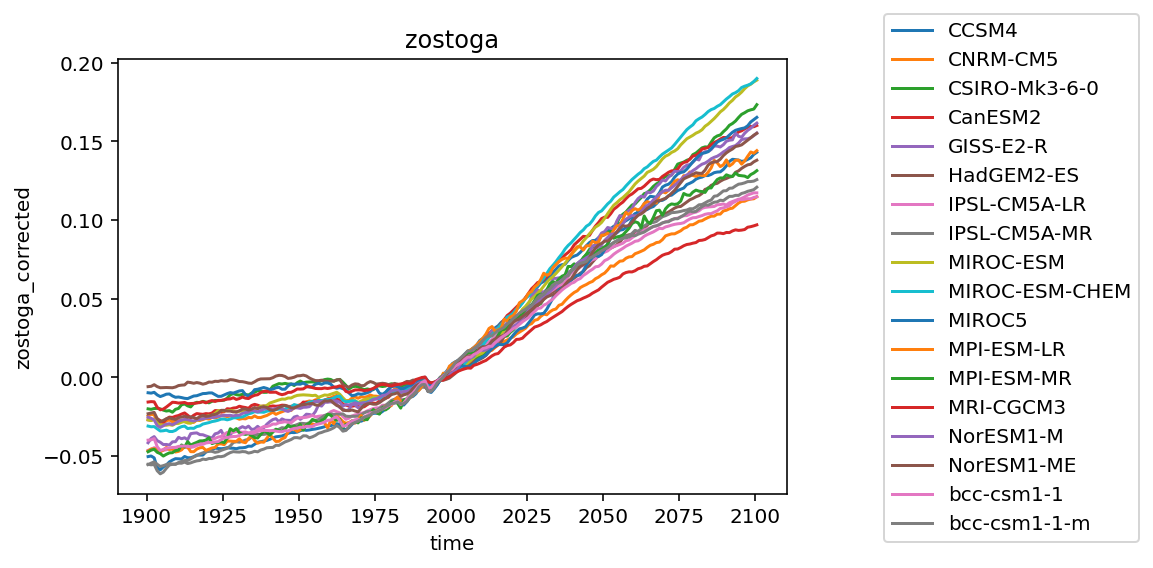

### Results for rcp45
24 models available
Mean and 5-95 percentile range: 
Year 2099
0.193235612561151 [ 0.14888935699220449 - 0.2375818681300975 ]
Year 2081-2099
0.17720451281448724 [ 0.1374653202568314 - 0.21694370537214303 ]


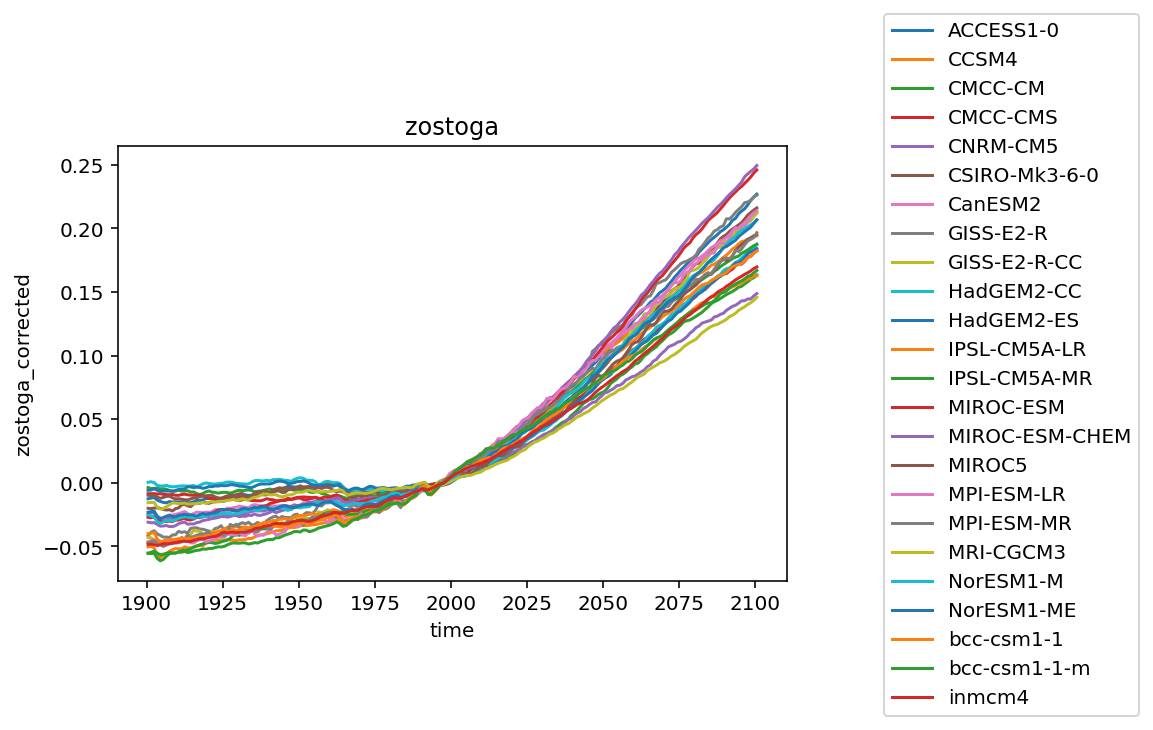

### Results for rcp85
24 models available
Mean and 5-95 percentile range: 
Year 2099
0.308129491109108 [ 0.25317064660648947 - 0.3630883356117265 ]
Year 2081-2099
0.26776922167101314 [ 0.22012245192469254 - 0.3154159914173337 ]


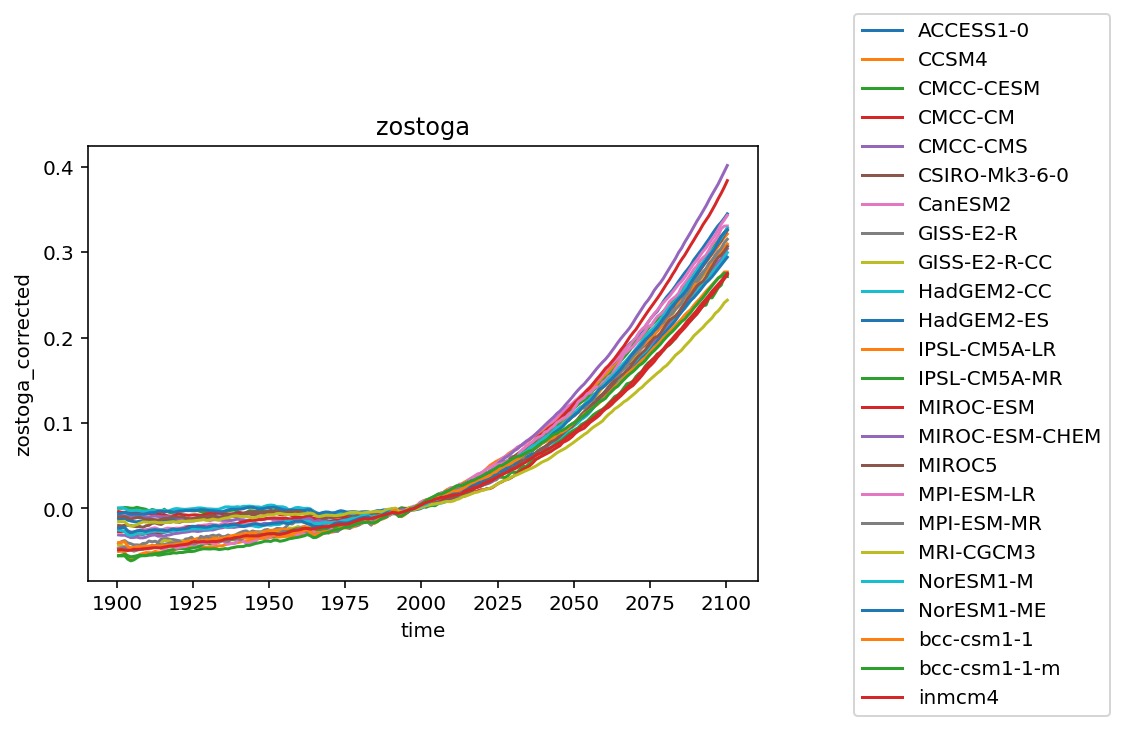

In [7]:
for sce in ['rcp26', 'rcp45', 'rcp85']:
    print(f'### Results for {sce}')
    zostoga_ds = pp.read_zostoga_ds(data_dir, 'cmip5', sce)
    print(f'{len(zostoga_ds.model)} models available')
    loc.print_results_da(zostoga_ds.zostoga_corrected)
    plot_all(zostoga_ds)

### Check CMIP6 data

### Results for ssp119
7 models available
Mean and 5-95 percentile range: 
Year 2099
0.14327824523263538 [ 0.11549068830652022 - 0.17106580215875056 ]
Year 2081-2099
0.1355996274511036 [ 0.11027252028946212 - 0.160926734612745 ]


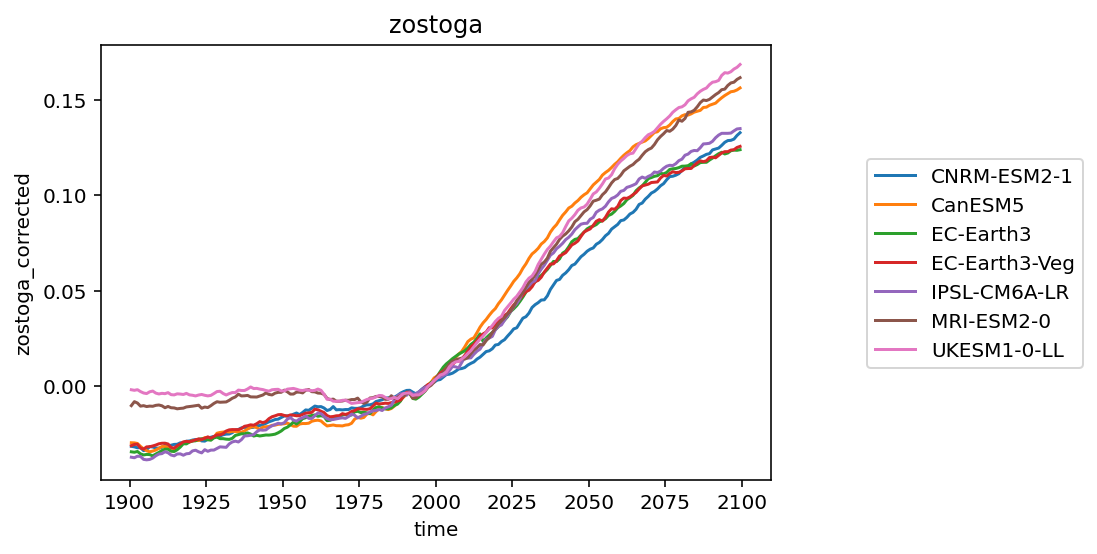

### Results for ssp126
21 models available
Mean and 5-95 percentile range: 
Year 2099
0.16029443616417705 [ 0.10993681847880826 - 0.21065205384954583 ]
Year 2081-2099
0.14984695337214135 [ 0.10401602159297149 - 0.19567788515131118 ]


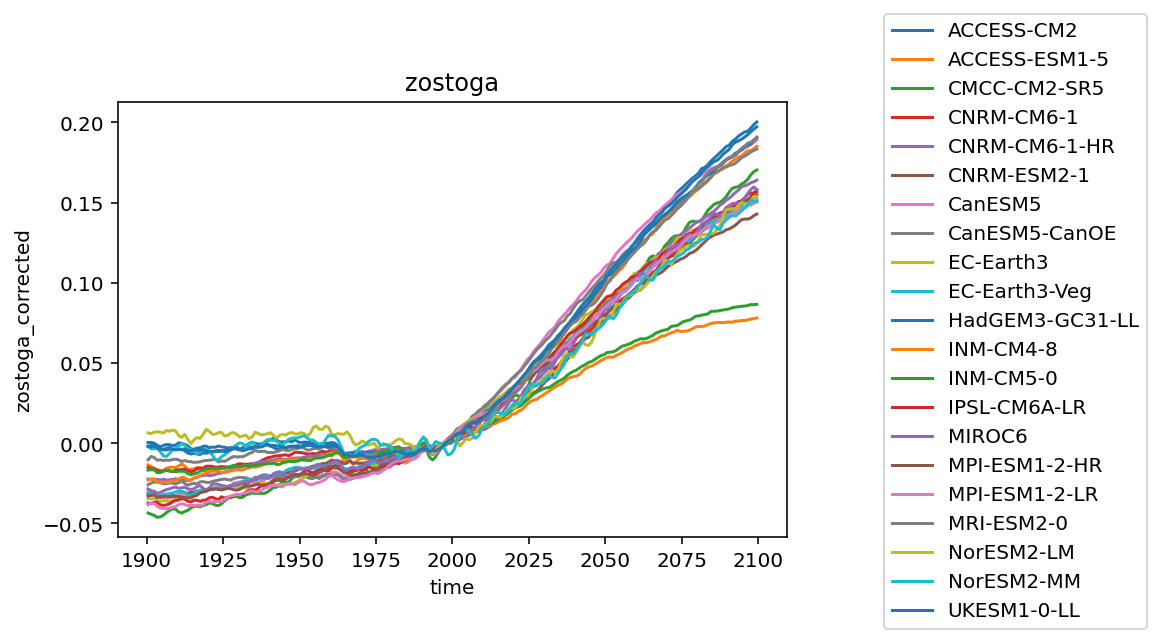

### Results for ssp245
21 models available
Mean and 5-95 percentile range: 
Year 2099
0.2141332708628882 [ 0.15257698530872066 - 0.2756895564170557 ]
Year 2081-2099
0.1924010250540561 [ 0.13727307276288703 - 0.24752897734522522 ]


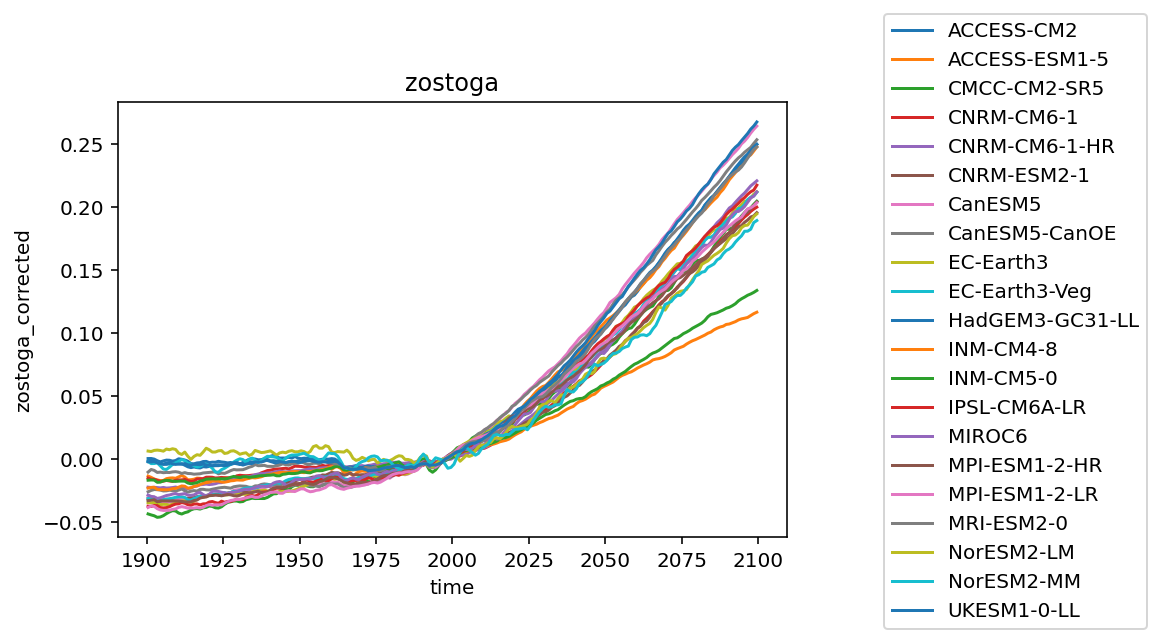

### Results for ssp585
21 models available
Mean and 5-95 percentile range: 
Year 2099
0.3207339440225613 [ 0.2225699678933501 - 0.41889792015177246 ]
Year 2081-2099
0.27288900398378224 [ 0.19079388879116718 - 0.35498411917639733 ]


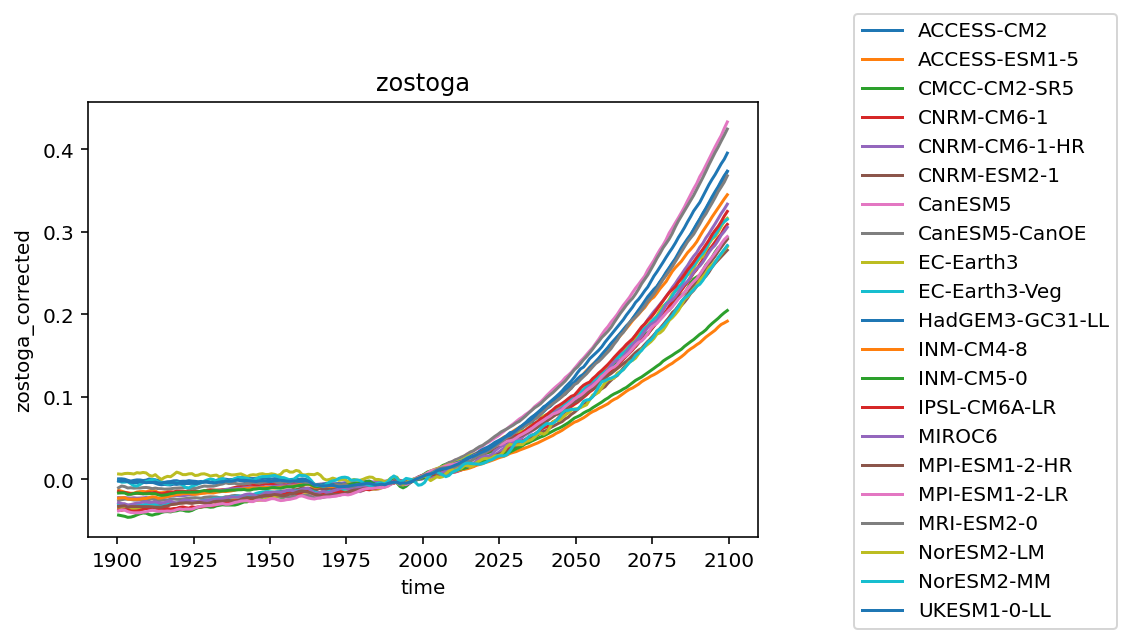

In [8]:
for sce in ['ssp119', 'ssp126', 'ssp245','ssp585']:
    print(f'### Results for {sce}')
    zostoga_ds = pp.read_zostoga_ds(data_dir, 'cmip6', sce)
    print(f'{len(zostoga_ds.model)} models available')
    loc.print_results_da(zostoga_ds.zostoga_corrected)
    plot_all(zostoga_ds)

### Compare CMIP5 and CMIP6 time series

In [18]:
def plot_all_ts(zostoga_ds, ax, title, ylabel):
    for mod in zostoga_ds.model:
        zostoga_ds.zostoga_corrected.sel(model=mod).plot(ax=ax, label=mod.values)
    ax.set_title(title)
    ax.set_ylim([-6, 45]) # 45 for 8.5, 30 for other scenarios

    if ylabel:
        ax.set_ylabel('Global-mean thermosteric sea-level anomalies [cm]')
    else:
        ax.set_ylabel('')
        
    ax.legend(loc='upper left', ncol=2)

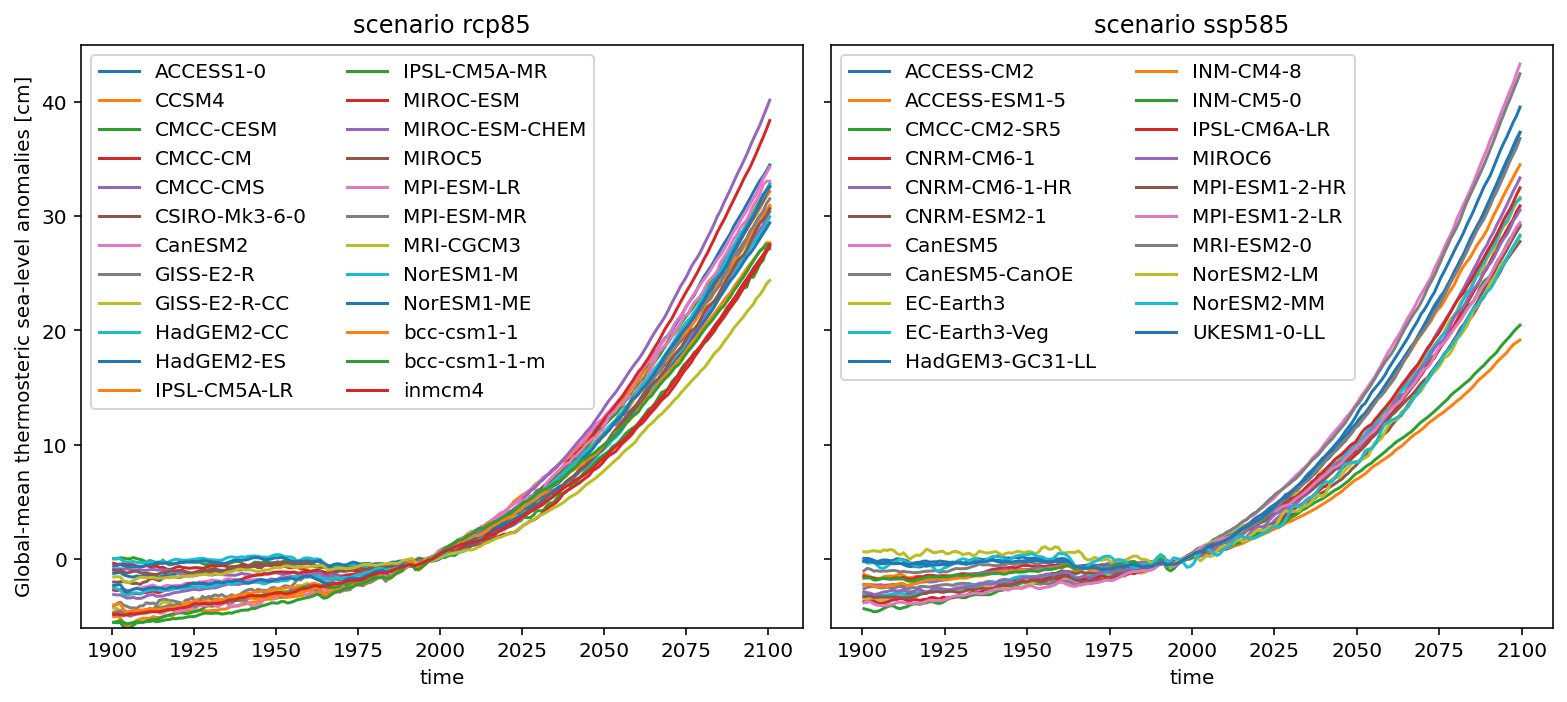

In [19]:
cmip5_sce = 'rcp85' #'rcp26'
cmip6_sce = 'ssp585' #'ssp126'

# Read data and convert from m to cm
cmip5_ds = pp.read_zostoga_ds(data_dir, 'cmip5', cmip5_sce)*100
cmip6_ds = pp.read_zostoga_ds(data_dir, 'cmip6', cmip6_sce)*100

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(11,5))

plot_all_ts(cmip5_ds, axes[0], f'scenario {cmip5_sce}', True)
plot_all_ts(cmip6_ds, axes[1], f'scenario {cmip6_sce}', False)

fig.tight_layout()

plt.savefig(f'../figures/zostoga_comp_{cmip5_sce}_{cmip6_sce}_ts.pdf', dpi=150)

### Convert xarray datasets to pandas dataframes

In [24]:
def ds2df(da):
    '''Transform an xarray DataArray to a pandas DataFrame with models as 
    column'''

    df = pd.DataFrame(dict(time=da.time))
    df = df.set_index('time')

    for mod in da.model.values:
        df[mod] = da.sel(model=mod).drop('model').to_dataframe()
        
    return df

In [25]:
cmip5_sce = 'rcp45' #'rcp45'
cmip6_sce = 'ssp245' #'ssp245'

# Read data and convert from m to cm
cmip5_ds = pp.read_zostoga_ds(data_dir, 'cmip5', cmip5_sce)*100
cmip6_ds = pp.read_zostoga_ds(data_dir, 'cmip6', cmip6_sce)*100

cmip5_df = ds2df(cmip5_ds.zostoga_corrected)
cmip6_df = ds2df(cmip6_ds.zostoga_corrected)


### Check the value distributions

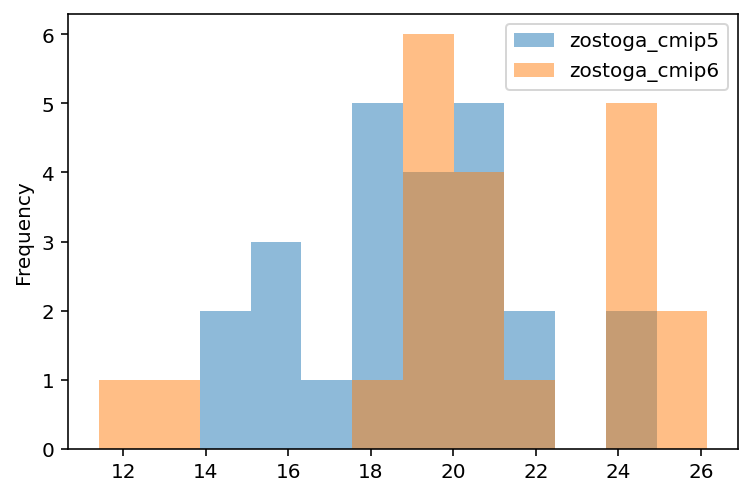

In [26]:
d = {'zostoga_cmip5': cmip5_df.loc[2095.5:2099.5].mean(axis=0),
     'zostoga_cmip6': cmip6_df.loc[2095.5:2099.5].mean(axis=0)}
both_cmip_df = pd.DataFrame(d)
both_cmip_df.plot.hist(bins=12, alpha=0.5);

### Compare CMIP5 and CMIP6 ensembles

Text(0, 0.5, 'Global-mean thermosteric sea-level anomalies [cm]')

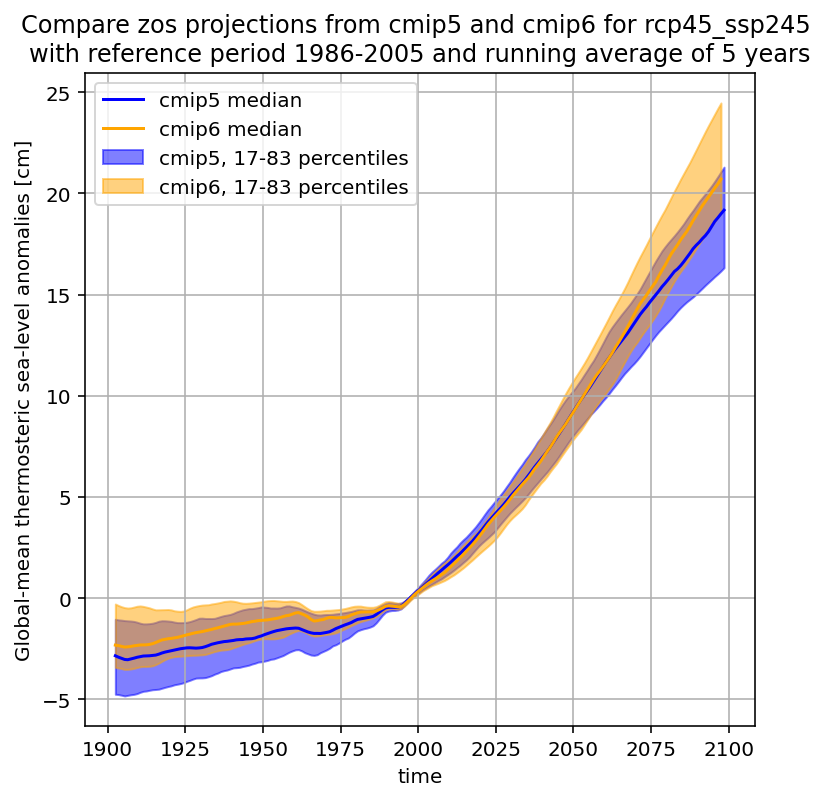

In [27]:
lower_bound = 0.17
upper_bound = 0.83
ra = 5 # runnning average window in years

pp.plot_cmip5_cmip6_ensembles(cmip5_sce, cmip5_df, cmip6_sce, cmip6_df, 
                              lower_bound, upper_bound, ra)
plt.ylabel('Global-mean thermosteric sea-level anomalies [cm]')
#plt.title('')

#plt.savefig(f'../figures/zostoga_comp_{cmip5_sce}_{cmip6_sce}_ensembles.pdf', dpi=150)

### Produce .csv files to easily make Microsoft Word table of the results

In [28]:
def edit_scen_name(sce):
    '''Convert name from rcp85 to RCP8.5 and ssp585 to SSP5-8.5'''
    
    if 'rcp' in sce:
        sce_out = f'{sce[0:3].upper()}{sce[3]}.{sce[4]}'
    elif 'ssp' in sce:
        sce_out = f'{sce[0:3].upper()}{sce[3]}-{sce[4]}.{sce[5]}'
    else:
        print('Scenario name not recognised')
    
    return sce_out

In [29]:
def make_summary_df(perc, years_s, years_e, mip, index=None):
    
    scen_dic = {'cmip5': ['Not available', 'rcp26', 'rcp45', 'rcp85'],
               'cmip6': ['ssp119', 'ssp126', 'ssp245', 'ssp585']}

    
    col = [f'{mip.upper()} Scenario']
    for p in perc:
        col.append(f'Percentile: {p}')
        
    summary_df = pd.DataFrame(columns=col)

    for idx, sce in enumerate(scen_dic[mip]):
        
        if sce == 'Not available':
            summary_df.loc[0] = ['Not available']*(len(perc)+1)
        
        else:
            cmip_ds = pp.read_zostoga_ds(data_dir, mip, sce)*100
            cmip_df = ds2df(cmip_ds.zostoga_corrected)
            mean_df = cmip_df.loc[years_s:years_e].mean(axis=0)
            val = [edit_scen_name(sce)]
            for p in perc:
                val.append(round(mean_df.quantile(p/100),1))
#                val.append(int(round(mean_df.quantile(p/100))))
            summary_df.loc[idx] = val
            
    if index == 'percentiles':
        summary_df.set_index(col[0], inplace=True)
        summary_df = summary_df.T
            
    return summary_df

In [30]:
perc = [17, 50, 83]
years_s = 2095.5
years_e = 2099.5

cmip5_summary_df = make_summary_df(perc, years_s, years_e, 'cmip5')
cmip6_summary_df = make_summary_df(perc, years_s, years_e, 'cmip6')

summary_df = pd.concat([cmip5_summary_df, cmip6_summary_df], axis=1)
summary_df

,CMIP5 Scenario,Percentile: 17,Percentile: 50,Percentile: 83,CMIP6 Scenario,Percentile: 17,Percentile: 50,Percentile: 83
0,Not available,Not available,Not available,Not available,SSP1-1.9,12.4,13.4,15.9
1,RCP2.6,11.5,13.9,16.2,SSP1-2.6,14.9,15.6,18.7
2,RCP4.5,16.2,19.0,21.1,SSP2-4.5,19.0,20.7,24.5
3,RCP8.5,26.8,29.7,32.1,SSP5-8.5,27.3,30.6,36.1


In [17]:
#summary_df.to_csv(f'../outputs/csv_files/zostoga_summary_{int(years_s)}_{int(years_e)}.csv', index=False)

### Summary bar figure

In [31]:
perc = [5, 17, 50, 83, 95]
years_s = 2095.5
years_e = 2099.5

cmip5_summary_df = make_summary_df(perc, years_s, years_e, 'cmip5', index='percentiles')
#cmip5_summary_df.index.rename('Scenario', inplace=True)
del(cmip5_summary_df['Not available'])

cmip6_summary_df = make_summary_df(perc, years_s, years_e, 'cmip6', index='percentiles')

cmip5_summary_df.columns.name = ''
cmip6_summary_df.columns.name = ''

cmip5_summary_df

,RCP2.6,RCP4.5,RCP8.5
Percentile: 5,11.0,14.6,25.8
Percentile: 17,11.5,16.2,26.8
Percentile: 50,13.9,19.0,29.7
Percentile: 83,16.2,21.1,32.1
Percentile: 95,18.5,23.5,35.8


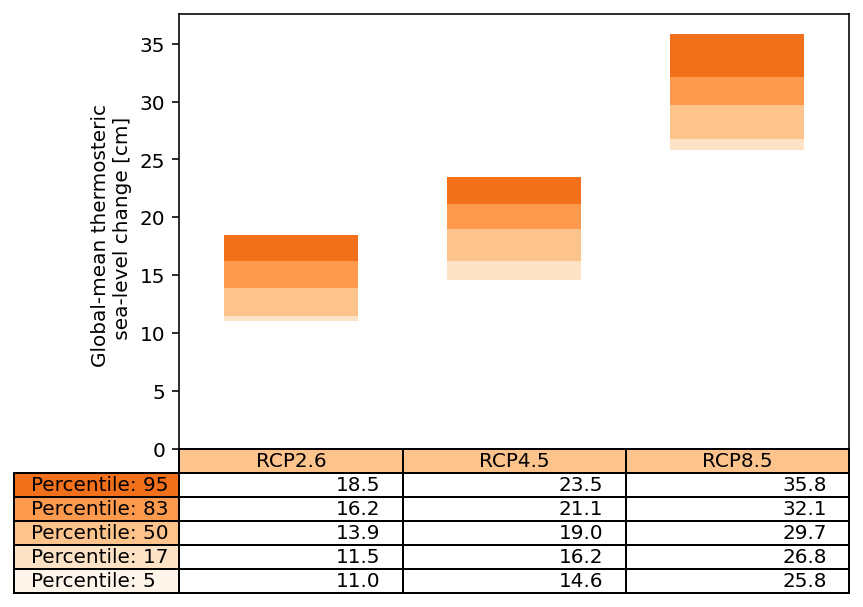

In [32]:
fig, ax = plt.subplots(1)

ax = pp.summary_fig_and_table(ax, cmip5_summary_df, colors=None)
ax.set_ylabel('Global-mean thermosteric \n sea-level change [cm]');


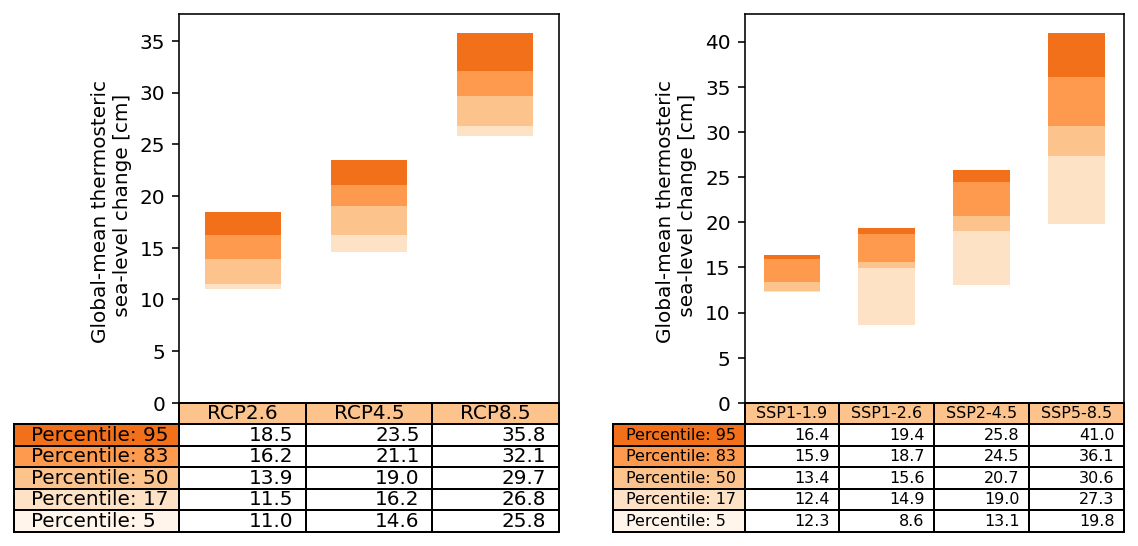

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

axes[0] = pp.summary_fig_and_table(axes[0], cmip5_summary_df, colors=None)
axes[0].set_ylabel('Global-mean thermosteric \n sea-level change [cm]')

axes[1] = pp.summary_fig_and_table(axes[1], cmip6_summary_df, colors=None)
axes[1].set_ylabel('Global-mean thermosteric \n sea-level change [cm]');

fig.tight_layout()

#### Plot CMIP5 and CMIP6 together

In [34]:
summary2_df = pd.concat([cmip5_summary_df, cmip6_summary_df], axis=1)
new_col_names =  ['SSP1-1.9','RCP2.6', 'SSP1-2.6', 'RCP4.5',  
                  'SSP2-4.5', 'RCP8.5', 'SSP5-8.5']
summary2_df = summary2_df.reindex(columns = new_col_names)
summary2_df

,SSP1-1.9,RCP2.6,SSP1-2.6,RCP4.5,SSP2-4.5,RCP8.5,SSP5-8.5
Percentile: 5,12.3,11.0,8.6,14.6,13.1,25.8,19.8
Percentile: 17,12.4,11.5,14.9,16.2,19.0,26.8,27.3
Percentile: 50,13.4,13.9,15.6,19.0,20.7,29.7,30.6
Percentile: 83,15.9,16.2,18.7,21.1,24.5,32.1,36.1
Percentile: 95,16.4,18.5,19.4,23.5,25.8,35.8,41.0


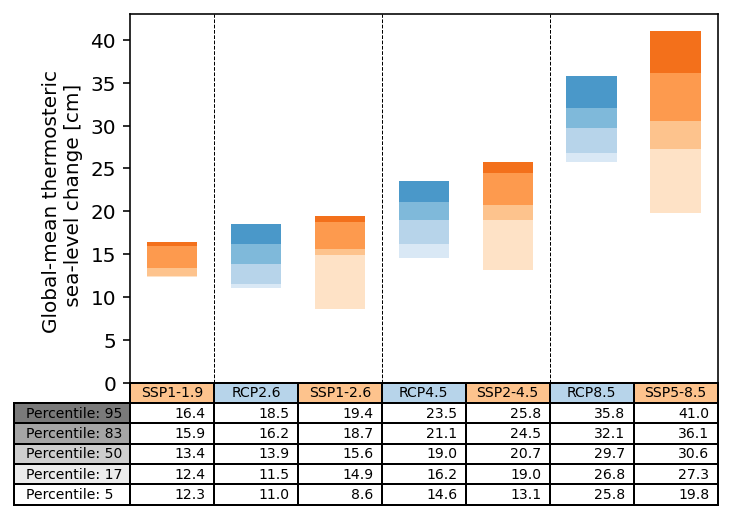

In [35]:
fig, ax = plt.subplots(1)

ax = pp.summary_fig_and_table(ax, summary2_df, colors='alternate', vlines=True)
ax.set_ylabel('Global-mean thermosteric \n sea-level change [cm]');

# Adjust layout to make room for the table:
# Only used when exporting the figure
plt.subplots_adjust(left=0.22, bottom=0.24)

#plt.savefig(f'../figures/zostoga_comp_bars.pdf', dpi=150)

Further improvements:
- Add information about the number of ensemble members for each scenarios

# Compare results with published literature:
- Jevrejeva et al. 2020
- Hermans et al. 2021

### Compare all scenarios